### Background
What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

### To complete the recommending task
There are generally two approaches:collaborative filtering based recommendation and content based recommendation. The collaborative filtering based solution is based on the assumption that users sharing similar interest tend to choose the same item and users are likely to choose similar items to what they have purchased. The behaviour and history  records of alargeamount of users will be used to filter out the most possible items that the user could be interested in; the content based solution singly takes the attributes of items into account and organise the sets of items according to their labels. Once an item is chosen by the user, the rest items within the same set will be recommendedt other user.


### Advantages of the content based solution .
The model doesn't need any data about other users, since the recommendations are specific to this user. This makes it easier to scale to a large number of users. The model can capture the specific interests of a user, and can recommend niche items that very few other users are interested in.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
movies=pd.read_csv("tmdb_5000_movies.csv")
credit=pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
credit

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [5]:
# getting one dataframe by merging id
credit = credit.rename(index=str, columns={"movie_id" : 'id'})
df = movies.merge(credit, on = 'id')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
df["title"]=df["title_x"]

In [8]:
# Drop columns not required 
df["title"]=df["title_x"]
df=df.drop(columns=['homepage', 'title_x', 'title_y',"original_title",'status',"id"])
df.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,title
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",Avatar
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",Pirates of the Caribbean: At World's End
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",Spectre
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",The Dark Knight Rises
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",John Carter


In [9]:
#calculte profit feature
df['profit'] = df.revenue - df.budget


In [10]:
features=['keywords','cast','crew','genres',"production_companies","production_countries","spoken_languages"]


In [11]:
from ast import literal_eval

for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [12]:
df.head()

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,title,profit
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Enter the World of Pandora.,7.2,11800,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",Avatar,2550965087
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]","At the end of the world, the adventure begins.",6.9,4500,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Pirates of the Caribbean: At World's End,661000000
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",A Plan No One Escapes,6.3,4466,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Spectre,635674609
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Legend Ends,7.6,9106,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",The Dark Knight Rises,834939099
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]","Lost in our world, found in another.",6.1,2124,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",John Carter,24139100


In [13]:
#getting director's name from the crew feature.
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

#Return list top 3 elements 
def get_list(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names=names[:3]
        return names
    #Return empty list in case of missing/malformed data
    return []

In [14]:
#Apply get_director function to 'crew' feature
df['director'] = df['crew'].apply(get_director)
#defining list of feature again to apply get_list function
features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [15]:
df


,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,title,profit,director
0,237000000,"[Action, Adventure, Fantasy]","[culture clash, future, space war]",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Enter the World of Pandora.,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",Avatar,2550965087,James Cameron
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]","At the end of the world, the adventure begins.",6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Pirates of the Caribbean: At World's End,661000000,Gore Verbinski
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent]",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",A Plan No One Escapes,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Spectre,635674609,Sam Mendes
3,250000000,"[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",en,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Legend Ends,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",The Dark Knight Rises,834939099,Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]",en,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]","Lost in our world, found in another.",6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",John Carter,24139100,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms]",es,El Mariachi just wants to play his guitar and ...,14.269792,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",1992-09-04,2040920,81.0,"[{'iso_639_1': 'es', 'name': 'Español'}]","He didn't come looking for trouble, but troubl...",6.6,238,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",El Mariachi,1820920,Robert Rodriguez
4799,9000,"[Comedy, Romance]",[],en,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],A newlywed couple's honeymoon is upended by th...,5.9,5,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",Newlyweds,-9000,Edward Burns
4800,0,"[Comedy, Drama, Romance]","[date, love at first sight, narration]",en,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{'name': 'Front Street Pictures', 'id': 3958}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-13,0,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.0,6,"[Eric Mabius, Kristin Booth, Crystal Low

In [16]:
df[['keywords','cast','crew','genres',"production_companies","production_countries","spoken_languages"]]


,keywords,cast,crew,genres,production_companies,production_countries,spoken_languages
0,"[culture clash, future, space war]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...","[Action, Adventure, Fantasy]","[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
1,"[ocean, drug abuse, exotic island]","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[Adventure, Fantasy, Action]","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
2,"[spy, based on novel, secret agent]","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[Action, Adventure, Crime]","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'iso_639_1': 'fr', 'name': 'Français'}, {'is..."
3,"[dc comics, crime fighter, terrorist]","[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[Action, Crime, Drama]","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,"[based on novel, mars, medallion]","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[Action, Adventure, Science Fiction]","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
...,...,...,...,...,...,...,...
4798,"[united states–mexico barrier, legs, arms]","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[Action, Crime, Thriller]","[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...","[{'iso_639_1': 'es', 'name': 'Español'}]"
4799,[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...","[Comedy, Romance]",[],[],[]
4800,"[date, love at first sight, narration]","[Eric Mabius, Kristin Booth, Crystal Lowe]","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[Comedy, Drama, Romance]","[{'name': 'Front Street Pictures', 'id': 3958}...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4801,[],"[Daniel Henney, Eliza Coupe, Bill Paxton]","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[],"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   keywords              4803 non-null   object 
 3   original_language     4803 non-null   object 
 4   overview              4800 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               4803 non-null   int64  
 10  runtime               4801 non-null   float64
 11  spoken_languages      4803 non-null   object 
 12  tagline               3959 non-null   object 
 13  vote_average          4803 non-null   float64
 14  vote_count            4803 non-null   int64  
 15  cast                 

In [18]:
df["tagline"].fillna(df['title'], inplace=True)

In [19]:
df=df.dropna()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4770 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4770 non-null   int64  
 1   genres                4770 non-null   object 
 2   keywords              4770 non-null   object 
 3   original_language     4770 non-null   object 
 4   overview              4770 non-null   object 
 5   popularity            4770 non-null   float64
 6   production_companies  4770 non-null   object 
 7   production_countries  4770 non-null   object 
 8   release_date          4770 non-null   object 
 9   revenue               4770 non-null   int64  
 10  runtime               4770 non-null   float64
 11  spoken_languages      4770 non-null   object 
 12  tagline               4770 non-null   object 
 13  vote_average          4770 non-null   float64
 14  vote_count            4770 non-null   int64  
 15  cast                 

## Analysis

In [21]:
df["release_date"]=pd.to_datetime(df["release_date"],format='%Y-%m-%d')
df["year"]=[m.year for m in df["release_date"]]
df["month"]=[m.month for m in df["release_date"]]

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [22]:
df1=df[["year","budget","profit","revenue"]]
df1 = df1.groupby('year').sum()
df1["year"]=df1.index
df1


,budget,profit,revenue,year
year,,,,
1916,385907,8008844,8394751,1916
1925,245000,21755000,22000000,1925
1927,92620000,-91969578,650422,1927
1929,379000,3979000,4358000,1929
1930,3950000,4050000,8000000,1930
...,...,...,...,...
2013,8205880834,15205612461,23411493295,2013
2014,7366740311,16753750278,24120490589,2014
2015,6709547364,16065476857,22775024221,2015


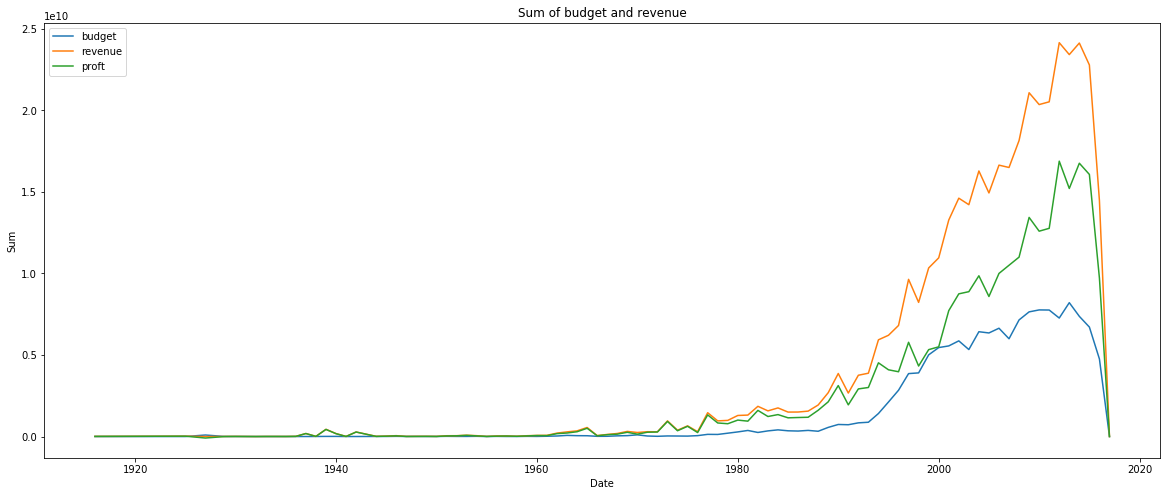

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(df1['year'], df1['budget'], label = 'budget')
plt.plot(df1['year'], df1['revenue'], label = 'revenue')
plt.plot(df1['year'], df1['profit'], label = 'proft')

plt.xlabel('Date'); plt.ylabel('Sum'); plt.title('Sum of budget and revenue')
plt.legend();

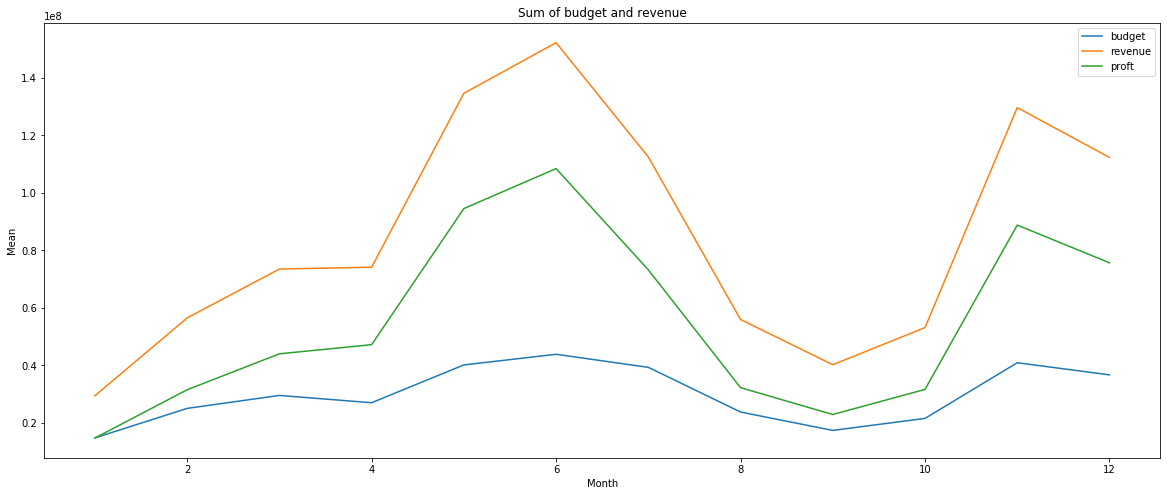

In [24]:
dfm=df[["month","budget","profit","revenue"]]
dfm = dfm.groupby('month').mean()
dfm["month"]=dfm.index
dfm
plt.figure(figsize=(20, 8))
plt.plot(dfm['month'], dfm['budget'], label = 'budget')
plt.plot(dfm['month'], dfm['revenue'], label = 'revenue')
plt.plot(dfm['month'], dfm['profit'], label = 'proft')

plt.xlabel('Month'); plt.ylabel('Mean'); plt.title('Sum of budget and revenue')
plt.legend();

In [25]:
df2=df[["year","runtime"]]
df2 = df2.groupby('year').mean()
df2["year"]=df1.index

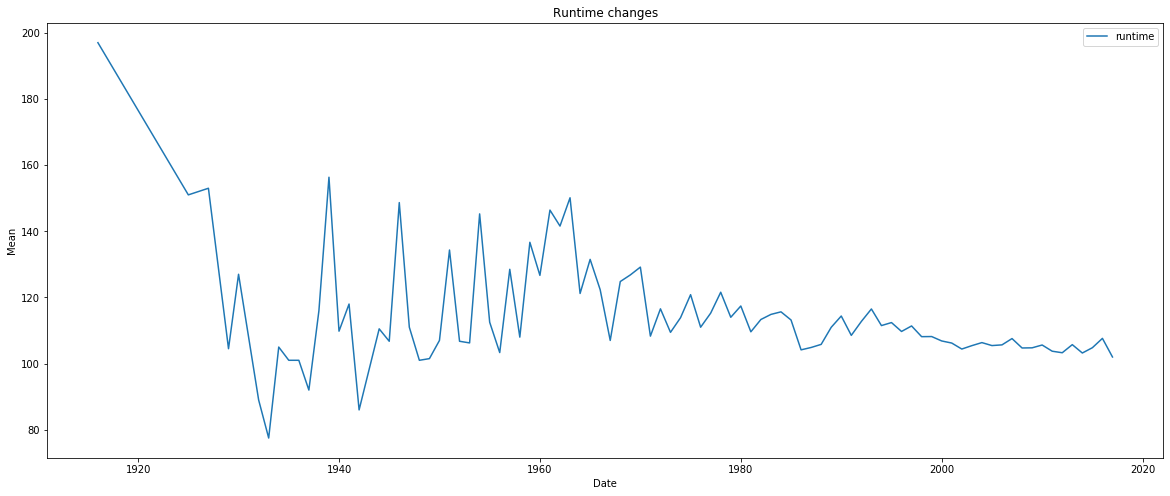

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(df2['year'], df2['runtime'], label = 'runtime')

plt.xlabel('Date'); plt.ylabel('Mean'); plt.title('Runtime changes')
plt.legend();

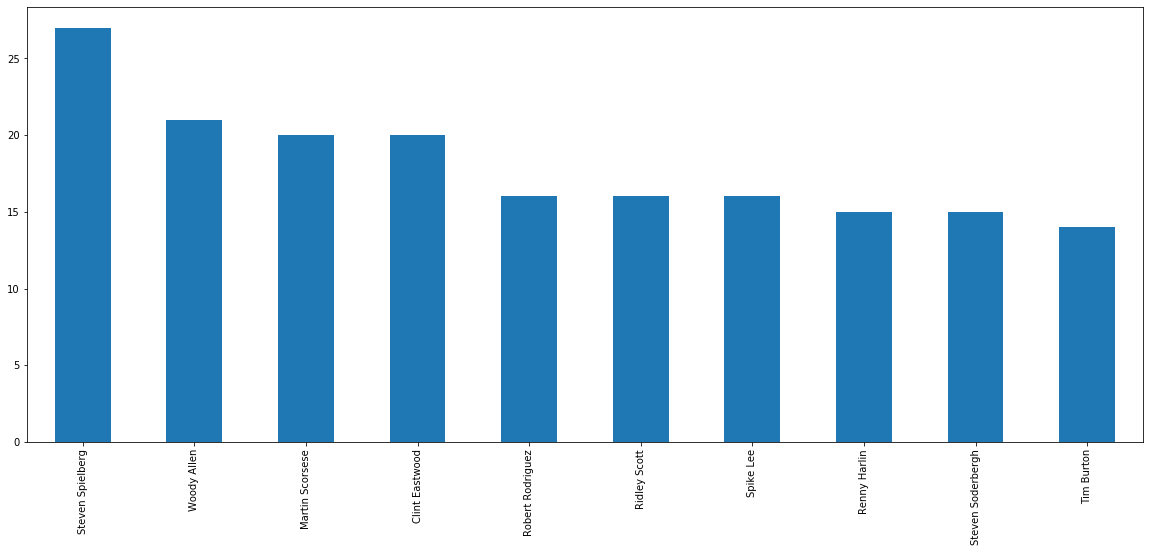

In [27]:
plt.figure(figsize=(20, 8))

df4=df["director"].value_counts().nlargest(10).plot(kind="bar")


### Maximum voting

In [28]:
df[df["vote_average"]>9].title

2386           One Man's Hero
3519         Stiff Upper Lips
3992                Sardaarji
4045    Dancer, Texas Pop. 81
Name: title, dtype: object

### Hieghest profit

In [29]:
df.sort_values(by='profit', ascending=False)["title"].head(10)


0                                             Avatar
25                                           Titanic
28                                    Jurassic World
44                                         Furious 7
16                                      The Avengers
7                            Avengers: Age of Ultron
124                                           Frozen
546                                          Minions
329    The Lord of the Rings: The Return of the King
31                                        Iron Man 3
Name: title, dtype: object

## Result:

june an november "has the highest average profit.<br> 
july and september has the lowest average profit.<br><br> 


Average runtime for movies = 105.72272177221366 minutes.<br> 
Minimum runtime for movies = 14.0 minutes.<br> 
Maximum runtime for movies = 338.0 minutes.<br> 
movie after 2000 tends to be in average runtme.<br> 
Long films are least popular.<br> 
Short films are gradually gaining more popularity.<br> <br> 
Maximum vote rating : One Man's Hero<br> 
                      Stiff Upper Lips<br> 
                      Sardaarji<br> 
                      Dancer, Texas Pop.<br> <br> 


Maximum vote rating:   Avatar<br> 
                       Titanic<br> 
                       Jurassic World<br> 
                       Furious 7<br> 
                       The Avengers<br> 
                       Avengers: Age of Ultron<br> 
                       Frozen<br> 
                       Minions<br> 
                       The Lord of the Rings: The Return of the King<br> 
                       Iron Man 3                     <br> 


## processing

In [30]:
df["year"] = df["year"].apply(str)
df["month"] = df["month"].apply(str)
df["vote_average"] = df["vote_average"].apply(str)



C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [31]:
def combine_features(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])+" ".join(x["year"])+" ".join(x["month"])+" ".join(x["vote_average"])

df['combine_feature'] = df.apply(combine_features,axis=1)

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [52]:
combine_feature=df[["title",'combine_feature']]
cf=combine_feature
combine_feature


,title,combine_feature
0,Avatar,culture clash future space war Sam Worthington...
1,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island Johnny Depp Orl...
2,Spectre,spy based on novel secret agent Daniel Craig C...
3,The Dark Knight Rises,dc comics crime fighter terrorist Christian Ba...
4,John Carter,based on novel mars medallion Taylor Kitsch Ly...
...,...,...
4798,El Mariachi,united states–mexico barrier legs arms Carlos ...
4799,Newlyweds,Edward Burns Kerry Bishé Marsha Dietlein Edwa...
4800,"Signed, Sealed, Delivered",date love at first sight narration Eric Mabius...
4801,Shanghai Calling,Daniel Henney Eliza Coupe Bill Paxton Daniel ...


In [33]:
combine_feature=combine_feature.apply(lambda x: x.str.lower().str.strip() if isinstance(x, object) else x)


In [53]:
combine_feature.to_csv (r"combine_features.csv", index = False, header=True)


In [54]:
pd.read_csv("combine_features.csv")

,title,combine_feature
0,Avatar,culture clash future space war Sam Worthington...
1,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island Johnny Depp Orl...
2,Spectre,spy based on novel secret agent Daniel Craig C...
3,The Dark Knight Rises,dc comics crime fighter terrorist Christian Ba...
4,John Carter,based on novel mars medallion Taylor Kitsch Ly...
...,...,...
4765,El Mariachi,united states–mexico barrier legs arms Carlos ...
4766,Newlyweds,Edward Burns Kerry Bishé Marsha Dietlein Edwa...
4767,"Signed, Sealed, Delivered",date love at first sight narration Eric Mabius...
4768,Shanghai Calling,Daniel Henney Eliza Coupe Bill Paxton Daniel ...


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [56]:
cv = CountVectorizer(stop_words='english') #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df["combine_feature"]) #feeding combined strings(movie contents) to CountVectorizer() object
cosine_sim = cosine_similarity(count_matrix,count_matrix)#calculating Cosine Similarity

In [57]:
d = cf.reset_index()
indices = pd.Series(df.index, index=d['title'])

In [58]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4770, dtype: int64

In [61]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    d=cf
    #d=d.apply(lambda x: x.str. capitalize() .str.strip() if isinstance(x, object) else x)
    return d['title'].iloc[movie_indices]

In [87]:
pd.DataFrame(get_recommendations('The Dark Knight Rises', cosine_sim))

,title
119,Batman Begins
65,The Dark Knight
280,Public Enemies
1196,The Prestige
2793,The Killer Inside Me
2388,I Am Wrath
3180,The Way of the Gun
3332,Harry Brown
299,Batman Forever
1792,Pain & Gain


In [88]:
list(get_recommendations('The Dark Knight Rises', cosine_sim))

['Batman Begins',
 'The Dark Knight',
 'Public Enemies',
 'The Prestige',
 'The Killer Inside Me',
 'I Am Wrath',
 'The Way of the Gun',
 'Harry Brown',
 'Batman Forever',
 'Pain & Gain']

In [89]:
df[df["title"].isin(list(get_recommendations('The Dark Knight Rises', cosine_sim)))]

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,vote_average,vote_count,cast,crew,title,profit,director,year,month,combine_feature
65,185000000,"[Drama, Action, Crime]","[dc comics, crime fighter, secret identity]",en,Batman raises the stakes in his war on crime. ...,187.322927,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2008-07-16,1004558444,...,8.2,12002,"[Christian Bale, Heath Ledger, Aaron Eckhart]","[{'credit_id': '55a0eb4a925141296b0010f8', 'de...",The Dark Knight,819558444,Christopher Nolan,2008,7,dc comics crime fighter secret identity Christ...
119,150000000,"[Action, Crime, Drama]","[himalaya, martial arts, dc comics]",en,"Driven by tragedy, billionaire Bruce Wayne ded...",115.040024,"[{'name': 'DC Comics', 'id': 429}, {'name': 'L...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2005-06-10,374218673,...,7.5,7359,"[Christian Bale, Michael Caine, Liam Neeson]","[{'credit_id': '52fe4230c3a36847f800ac6d', 'de...",Batman Begins,224218673,Christopher Nolan,2005,6,himalaya martial arts dc comics Christian Bale...
280,80000000,"[History, Crime, Drama]","[cinema, hiding place, machinegun]",en,Depression-era bank robber John Dillinger's ch...,33.691694,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-07-01,214104620,...,6.5,1344,"[Christian Bale, Johnny Depp, Giovanni Ribisi]","[{'credit_id': '52fe44259251416c7502a791', 'de...",Public Enemies,134104620,Michael Mann,2009,7,cinema hiding place machinegun Christian Bale ...
299,100000000,"[Action, Crime, Fantasy]","[riddle, dc comics, rose]",en,The Dark Knight of Gotham City confronts a das...,48.205606,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-05-31,336529144,...,5.2,1498,"[Val Kilmer, Tommy Lee Jones, Jim Carrey]","[{'credit_id': '52fe4241c3a36847f800fe1f', 'de...",Batman Forever,236529144,Joel Schumacher,1995,5,riddle dc comics rose Val Kilmer Tommy Lee Jon...
1196,40000000,"[Drama, Mystery, Thriller]","[competition, secret, obsession]",en,A mysterious story of two magicians whose inte...,74.440708,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-10-19,109676311,...,8.0,4391,"[Hugh Jackman, Christian Bale, Michael Caine]","[{'credit_id': '52fe42e8c3a36847f802beed', 'de...",The Prestige,69676311,Christopher Nolan,2006,10,competition secret obsession Hugh Jackman Chri...
1792,25000000,"[Thriller, Crime, Action]","[miami, scam, crime]",en,"Daniel Lugo, manager of the Sun Gym in 1990s M...",31.893932,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-04-18,86175291,...,6.1,1573,"[Mark Wahlberg, Dwayne Johnson, Anthony Mackie]","[{'credit_id': '52fe4bcdc3a368484e199d03', 'de...",Pain & Gain,61175291,Michael Bay,2013,4,miami scam crime Mark Wahlberg Dwayne Johnson ...
2388,18000000,"[Action, Crime, Drama]","[revenge, murder, police corruption]",en,A man is out for justice after a group of corr...,10.144222,"[{'name': 'Patriot Pictures', 'id': 2373}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-04-14,0,...,4.5,179,"[John Travolta, Christopher Meloni, Rebecca De...","[{'credit_id': '56c5999b9251415475000194', 'de...",I Am Wrath,-18000000,Chuck Russell,2016,4,revenge murder police corruption John Travolta...
2793,13000000,"[Crime, Drama, Thriller]","[sheriff, crime fighter]",en,Deputy Sheriff Lou Ford is a pillar of the com...,11.892615,"[{'name': 'Revolution Films', 'id': 163}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-02-19,0,...,6.0,173,"[Casey Affleck, Kate Hudson, Jessica Alba]","[{'credit_id': '52fe46469251416c9104f0fd', 'de...",The Killer Inside Me,-13000000,Michael Winterbottom,2010,2,sheriff crime fighter Casey Affleck Kate Hudso...
3180,8500000,"[

### The results are multiple movies with same director, actress, category, or other weighted features.

# Done